Q1: The number of multiplications are nmk, and number of additions are nm(k-1). We mutiply one number from each column of first matrix with one number from each row of second matrix. This is equal to k. We add these k numbers, which means k-1 additions. And, the total number of entries we have to fill this way is nm. And hence, the answer.
Multiplications: nmk
Additions: nm(k-1)

In [1]:
#Q2:
n = int(input())
k = int(input())
m = int(input())


5
4
3


In [1]:
import random
import numpy as np
from itertools import repeat

In [3]:
firstMat = []
secMat = []

for i in range(n):
    lst = random.sample(range(0,100),k)
    firstMat.append(lst)
for j in range(k):
    lst = random.sample(range(0,100),m)
    secMat.append(lst)
    
print(firstMat)
print(secMat)

[[27, 91, 0, 34], [17, 75, 48, 88], [68, 13, 9, 12], [61, 76, 74, 16], [50, 4, 85, 68]]
[[52, 8, 76], [23, 50, 14], [75, 80, 93], [8, 71, 57]]


In [4]:
def listoflists():
    ansMat = np.zeros((n,m),dtype=int)
    for i in range(n):
        for j in range(m):
            for l in range(k):
                ansMat[i][j] += firstMat[i][l]*secMat[l][j]

    #print(ansMat)
    
listoflists()

In [5]:
import timeit

mat1 = firstMat
mat2 = secMat

def func1():
    startTime = timeit.default_timer()
    resultlol = listoflists()
    endTime =  timeit.default_timer()
    return endTime-startTime

p = 0
for i in range(10):
    l = func1()
    p = p+l
    
print("Time taken using list of lists:", p/10, "seconds")

mat1np = np.array(mat1)
mat2np = np.array(mat2)

def func2():
    startTime =  timeit.default_timer()
    resultnumpy = np.matmul(mat1np, mat2np)
    endTime = timeit.default_timer()
    return endTime-startTime

q = 0
for i in range(10):
    l = func2()
    q = q+l

print("Time taken using NumPy:", q/10, "seconds")


Time taken using list of lists: 3.671657759696245e-05 seconds
Time taken using NumPy: 7.808394730091096e-06 seconds


As we can see from the results above, the time for both the methods differ by a factor of 4 or 5 atleast. This happens because the implementation of a list in Python is such that it can contain any data type. But, when we use numpy it makes sure that all the contents of the array are the same data type. This saves time in computation as the overhead of checking for the same data type is saved. 

#Q3:
Finding median using that method requires n/2 passes (in case of even n) or n+1/2 passes (otherwise). In ith pass, we have to go through n-i-1 elements. 

Thus, the time complexity will be: 
TC: O(n+n-1+n-2.....n/2) which will be O(n^2)

Alternatively, we can use Python's sorting function and then find the median. The TC of python's sort function is O(nlogn) for average and worst cases (Cross checked with: Google). 



In [2]:
import timeit
def conv_median(n):
    lst = []
    for i in range(n):
        lst.append(random.randint(0,1000))
    
    print(lst)
    start = timeit.default_timer()
    if n%2==0:
        for i in range(0,n//2-1):
            maxi = -1
            maxind = -1
            for j in range(0,len(lst)):
                if maxi<lst[j]:
                    maxi = lst[j]
                    maxind = j
            lst.pop(maxind)
        int1 = 0
        int2 = 0
        maxi = -1
        maxind = -1
        for i in range(len(lst)):
            if maxi<lst[i]:
                maxi = lst[i]
                maxind = i
        int1 = maxi
       # print(int1)
        lst.pop(maxind)
        maxi = -1
        maxind = -1
        for i in range(0,len(lst)):
            if maxi<lst[i]:
                maxi = lst[i]
                maxind = i
        int2 = maxi
#        print(int2)
        end = timeit.default_timer()
        print((int1+int2)/2)
        return end-start
    
    else:
        for i in range(0,n//2):
            maxi = -1
            maxind = -1
            for j in range(0,len(lst)):
                if maxi<lst[j]:
                    maxi = lst[j]
                    maxind = j
            lst.pop(maxind) 
        maxi = -1
        maxind = -1
        for i in range(len(lst)):
            if maxi<lst[i]:
                maxi = lst[i]
                maxind = i
        int1 = maxi
        end = timeit.default_timer()
        print(int1)
        return end - start
    
n =int(input())
q = 0
for i in range(10):
    l = conv_median(n)
    q = q+l
    
print("Time taken using given algo:", q/10, "seconds")



5
[72, 217, 893, 424, 840]
424
[869, 523, 623, 392, 306]
523
[739, 923, 684, 446, 877]
739
[871, 379, 50, 970, 547]
547
[905, 598, 168, 239, 270]
270
[873, 586, 592, 433, 244]
586
[380, 180, 544, 328, 888]
380
[375, 637, 409, 264, 247]
375
[216, 230, 1, 949, 870]
230
[273, 722, 138, 204, 168]
204
Time taken using given algo: 4.808278754353524e-06 seconds


In [8]:
def sort_median(lst):
    start= timeit.default_timer()
    lst.sort()
    if len(lst)%2==0:
        median = (lst[len(lst)//2-1] + lst[len(lst)//2])/2
    else:
        median = lst[len(lst)//2]
    print(median)
    end = timeit.default_timer()
    return end - start
 
n = int(input())
lst = []
for i in range(n):
    lst.append(random.randint(0,1000))
print(lst)
q = []
for i in range(10):
    time = sort_median(entries)
    q.append(time)
print(np.sum(q)/10)

5
[915, 513, 943, 618, 386]
289
289
289
289
289
289
289
289
289
289
4.254025407135487e-06


In [10]:
def np_median(lst):
    start= timeit.default_timer()
    lst.sort()
    med = np.median(lst)
    print(med)
    end = timeit.default_timer()
    return end - start
 
n = int(input())
lst = []
for i in range(n):
    lst.append(random.randint(0,1000))
print(lst)
q = []
for i in range(10):
    time = sort_median(entries)
    q.append(time)
print(np.sum(q)/10)

5
[663, 745, 426, 389, 890]
289
289
289
289
289
289
289
289
289
289
3.974861465394497e-06


The np median algorithm works the fastest. 

In [ ]:
pip show jaxlib

#Q4:
The gradient of the function x^2 + y^3 * sin(x) is:
2xy + y^3 * cos(x) with respect to x, and
x^2 + 3y^2 * sin(x) with respect to y.

In [ ]:
#Q5:
import jax
from jax import grad

def f(x, y):
    return x**2 * y + y**3 * np.sin(x)

df_dx = jax.grad(f, 0)
df_dy = jax.grad(f, 1)

grad_x = df_dx(1.0, 2.0)
grad_y = df_dy(3.0, 4.0)

print(grad_x) 
print(grad_y)

In [103]:
#Q6:
import sympy

f = x**2 * y + y**3 * sympy.sin(x)

x, y= sympy.symbols('x y')
#sympy.init_printing(use_unicode=True)

grad_x = sympy.diff(f,x)
grad_y = sympy.diff(f,y)
print(grad_x)
print(grad_y)

2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


In [97]:
#Q7:

student_records = {
    2022: {
        'Branch CSE': {
            1:{'Roll Number': 1,
                'Name': 'Hirva',
                'Marks': {
                    'Maths': 100,
                    'English': 70,
                }
              },
            2:{'Roll Number': 2,
                'Name': 'Dhruv',
                'Marks': {
                    'Maths': 100,
                    'English': 70,
                }
        }
        },
        'Branch CHEM': {
            3:{'Roll Number': 3,
                'Name': 'Harshi',
                'Marks': {
                    'Maths': 100,
                    'English': 70,
                }
              }
        }
    ,2023: {
        'Branch 1': {
        },
        'Branch 2': {

        }
    }
}
}
print(student_records[2022]['Branch CSE'][1]['Name']) 
print(student_records[2022]['Branch CHEM'][3]['Marks']['Maths'])

Hirva
100


In [90]:
#Q8:
class student:
    def __init__(self, roll_no, name):
        self.roll_no = roll_no
        self.name = name
        self.marks = {}

    def add_subject_mark(self, subject, mark):
        self.marks[subject] = mark

class branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)


database = []

year_2022 = year(2022)

branch_cse_2022 = branch("Branch CSE")
student_1_2022 = student(1, "Hirva")
student_1_2022.add_subject_mark("Maths", 100)
student_1_2022.add_subject_mark("English", 70)

student_2_2022 = student(2, "Dhruv")
student_2_2022.add_subject_mark("Maths", 100)
student_2_2022.add_subject_mark("English", 70)

branch_chem_2022 = branch("Branch CHEM")
student_3_2022 = student(3, "Harshi")
student_3_2022.add_subject_mark("Maths", 100)
student_3_2022.add_subject_mark("English", 70)

branch_cse_2022.add_student(student_1_2022)
branch_cse_2022.add_student(student_2_2022)
branch_chem_2022.add_student(student_3_2022)

year_2022.add_branch(branch_cse_2022)
year_2022.add_branch(branch_chem_2022)


database.append(year_2022)
print(database[0].branches[1].students[0].name) 
print(database[0].branches[0].students[0].marks['Maths']) 


Harshi
100


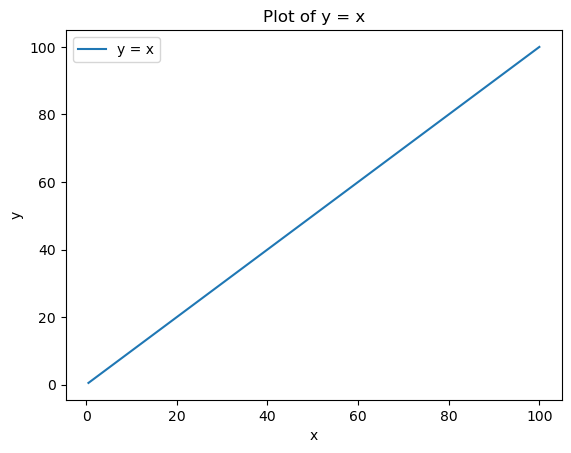

In [44]:
#Q9:
import matplotlib.pyplot as plt

def f(x):
    return x

x_val = np.arange(0.5, 100.5, 0.5)
y_val = f(x_val)

plt.plot(x_val, y_val, label='y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')
plt.legend()
plt.show()

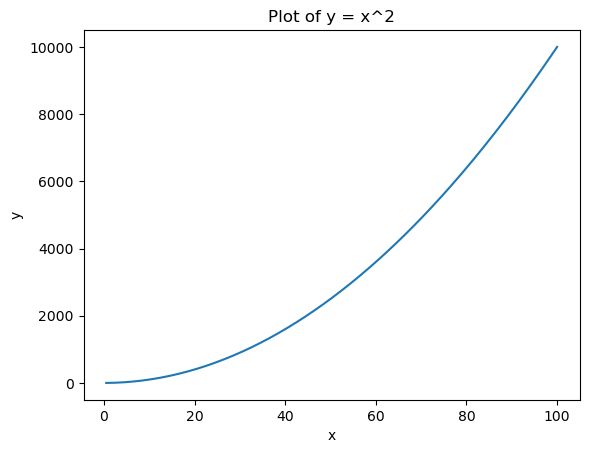

In [55]:
def f(x):
    return x**2

x_val = np.arange(0.5, 100.5, 0.5)
y_val = f(x_val)

plt.plot(x_val, y_val)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^2')
plt.show()

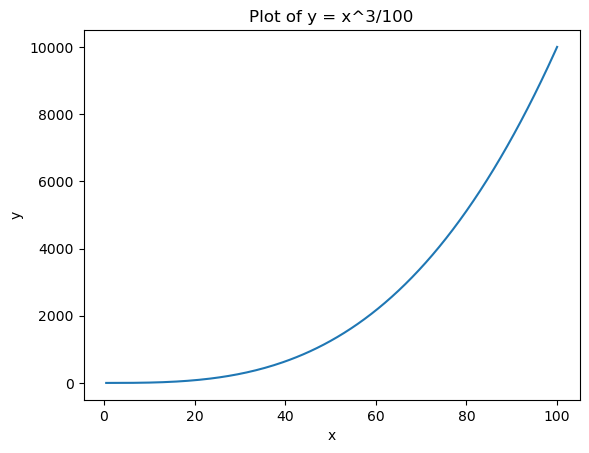

In [54]:
def f(x):
    return (x**3)/100

x_val = np.arange(0.5, 100.5, 0.5)
y_val = f(x_val)

plt.plot(x_val, y_val)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^3/100')
plt.show()

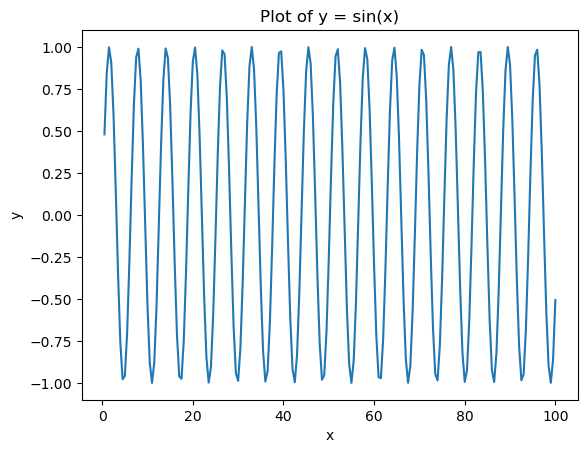

In [53]:
def f(x):
    return np.sin(x)

x_val = np.arange(0.5, 100.5, 0.5)
y_val = f(x_val)

plt.plot(x_val, y_val)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)')
plt.show()

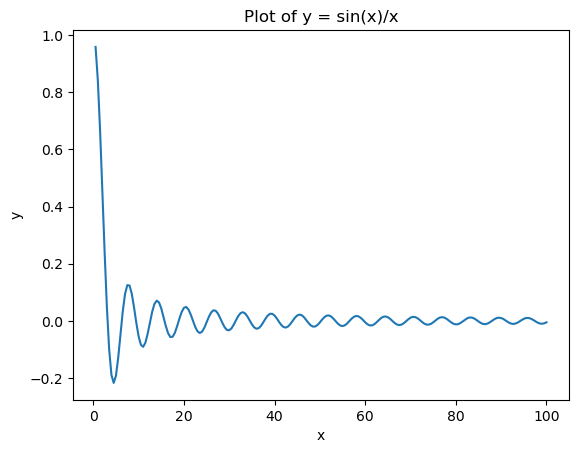

In [52]:
def f(x):
    return np.sin(x)/x

x_val = np.arange(0.5, 100.5, 0.5)
y_val = f(x_val)

plt.plot(x_val, y_val)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)/x')
plt.show()

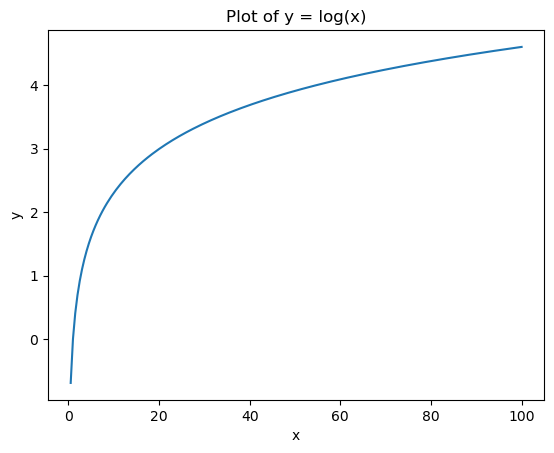

In [51]:
def f(x):
    return np.log(x)

x_val = np.arange(0.5, 100.5, 0.5)
y_val = f(x_val)

plt.plot(x_val, y_val)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = log(x)')
plt.show()

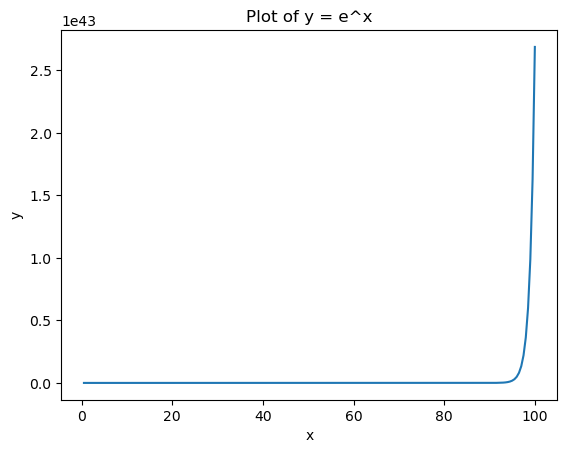

In [56]:
def f(x):
    return np.exp(x)

x_val = np.arange(0.5, 100.5, 0.5)
y_val = f(x_val)

plt.plot(x_val, y_val)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = e^x')
plt.show()

In [73]:
#Q10:
import pandas as pd

mat = np.random.uniform(1,2,(20, 5))
df = pd.DataFrame(mat, columns=['a', 'b', 'c', 'd', 'e'])

maxstddev = df.std().idxmax()
minmedian = df.mean(axis = 1).idxmin()

print(df,"\n")
print("col with highest std dev:",maxstddev)
print("row with min median:",minmedian)

           a         b         c         d         e
0   1.448519  1.310069  1.037813  1.245180  1.800724
1   1.868756  1.954394  1.929064  1.210055  1.753849
2   1.287902  1.033733  1.168848  1.827324  1.564292
3   1.904323  1.675915  1.771289  1.353295  1.400230
4   1.993096  1.435796  1.444922  1.360004  1.257278
5   1.547977  1.612632  1.721098  1.608055  1.992667
6   1.427917  1.198353  1.411856  1.196841  1.864603
7   1.831702  1.779194  1.139401  1.670132  1.715322
8   1.397904  1.411411  1.839119  1.165528  1.717693
9   1.430025  1.048064  1.577149  1.703176  1.037282
10  1.171718  1.896578  1.555781  1.366615  1.510705
11  1.645978  1.009295  1.962058  1.424454  1.467230
12  1.270978  1.137137  1.238548  1.029674  1.701009
13  1.053955  1.338133  1.505969  1.055308  1.087401
14  1.423999  1.157066  1.848764  1.168044  1.798465
15  1.436342  1.917977  1.335320  1.035529  1.270000
16  1.241355  1.876514  1.939899  1.256762  1.622560
17  1.372266  1.208384  1.892051  1.625039  1.

In [72]:
#Q11:

df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
num_lt8 = df[df['g'] == 'LT8'].shape[0]
std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print(df,"\n")
print("Num of rows where g is LT8:",num_lt8)
print("Std dev of f in LT8 row:", std_lt8)
print("Std dev of f in GT8 row:", std_gt8)

           a         b         c         d         e         f    g
0   1.795274  1.126865  1.404217  1.295520  1.240316  6.862192  LT8
1   1.090134  1.816387  1.712771  1.916000  1.491777  8.027069  GT8
2   1.095486  1.967254  1.067741  1.702767  1.097142  6.930391  LT8
3   1.671971  1.854846  1.156255  1.609420  1.853150  8.145642  GT8
4   1.545915  1.159561  1.621320  1.106306  1.125458  6.558560  LT8
5   1.309647  1.951297  1.583122  1.829532  1.357612  8.031210  GT8
6   1.549767  1.304412  1.805724  1.176653  1.520641  7.357197  LT8
7   1.718046  1.340363  1.454099  1.604942  1.386214  7.503664  LT8
8   1.123867  1.530071  1.464081  1.389725  1.672427  7.180172  LT8
9   1.136280  1.985566  1.423005  1.575102  1.377347  7.497300  LT8
10  1.561232  1.034105  1.615529  1.547452  1.109430  6.867748  LT8
11  1.374433  1.124238  1.182965  1.113291  1.033089  5.828015  LT8
12  1.754295  1.387958  1.417270  1.177035  1.537785  7.274342  LT8
13  1.508433  1.345885  1.777400  1.608641  1.28

#Q12:
 
Broadcasting is a feature of Numpy to adjust for different shapes of a matrix. This has been explained through an example below:

In [74]:
a = np.array([[1, 3, 2], [14, 5, 6]])
b = np.array([100, 200, 300])

c = a+b
print(c)

[[101 203 302]
 [114 205 306]]


Now, as we can see, matrix b has shape(1,3) but it adjusts to (2,3) making copy of the same row again. This increases the speed and eliminates the need to adjust shape of matrices many times.


In [87]:
#Q13:
#import sys
array = np.array([10,40,50,60,70,5])

def argminf(array):
    mini = array[0]
    miniind = 0
    for i in range(1, len(array)):
        if array[i] < mini:
            mini = array[i]
            miniind = i
    return miniind

print("using function",argminf(array))
print("using numpy",np.argmin(array))
                
            

using function 5
using numpy 5
